In [3]:
!pip install pmdarima
!pip install statsmodels


# Assignmetn 6
## Parth Kothari
## Roll No.: 2303121012

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Covid Data

P-value of the data 1.0
p_value after first order differencing  0.8984569947893328
P value after 2nd order differencing 1.0426744091834329e-07
Therefore the series is stationary with parameter d=2


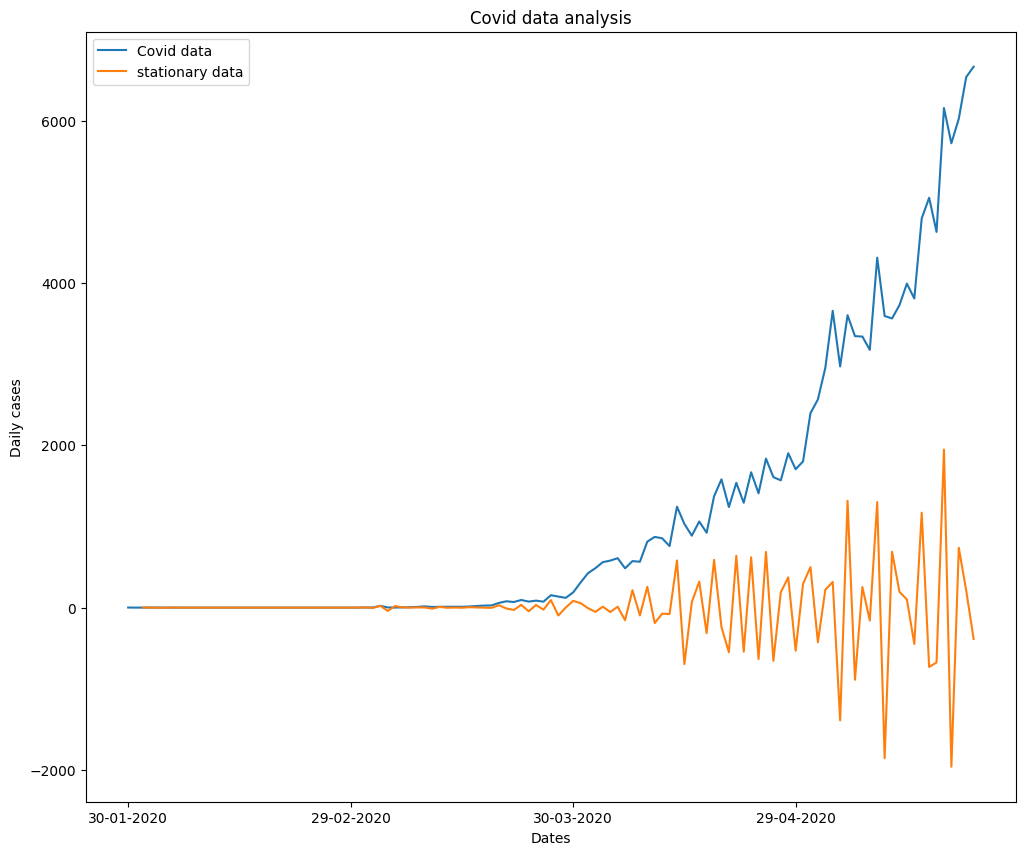

In [80]:
# COVID DATA
df_cov = pd.read_csv('covid.csv',parse_dates=True)
dates = (df_cov['DATE'])
cases = (df_cov['Daily_Confirmed'])
plt.figure(figsize=(12,10))
plt.plot(dates,cases,label='Covid data')
plt.xlabel('Dates')
plt.ylabel('Daily cases')
plt.xticks(np.arange(0,len(cases),step=30))
plt.title('Covid data analysis')

#adf and stationary tests!
adf = adfuller(cases)
print('P-value of the data',adf[1])
cases_1 = cases.diff().dropna()
adf1 = adfuller(cases_1)
print('p_value after first order differencing ',adf1[1])
cases_2 = cases_1.diff().dropna()
adf2 = adfuller(cases_2)
print('P value after 2nd order differencing',adf2[1])
print('Therefore the series is stationary with parameter d=2')

cases_2.plot(label='stationary data')
plt.legend()

From the graph of pacf and acf the p and q values are 13,14


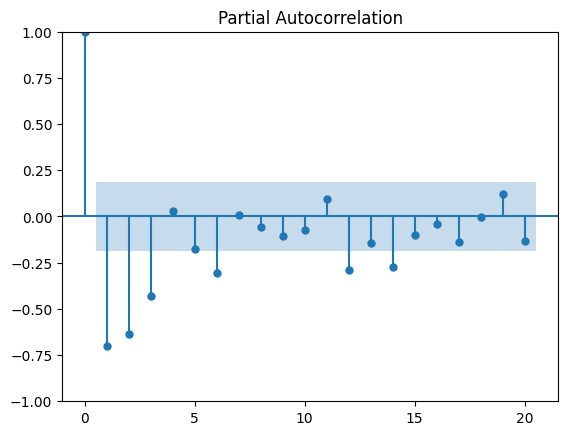

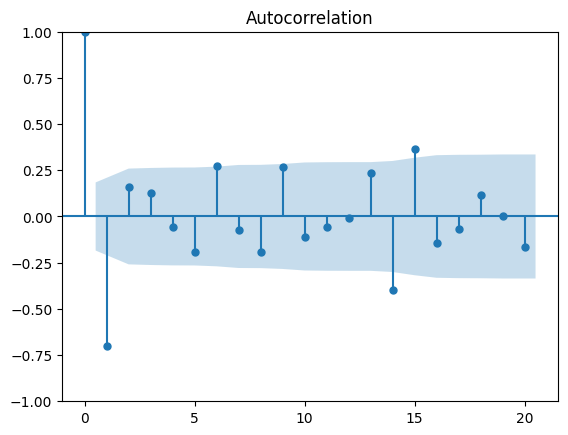

In [81]:
pacf = plot_pacf(cases_2,lags=20)
acf = plot_acf(cases_2,lags=20)
#we are taking the mod values of
print('From the graph of pacf and acf the p and q values are 13,14')

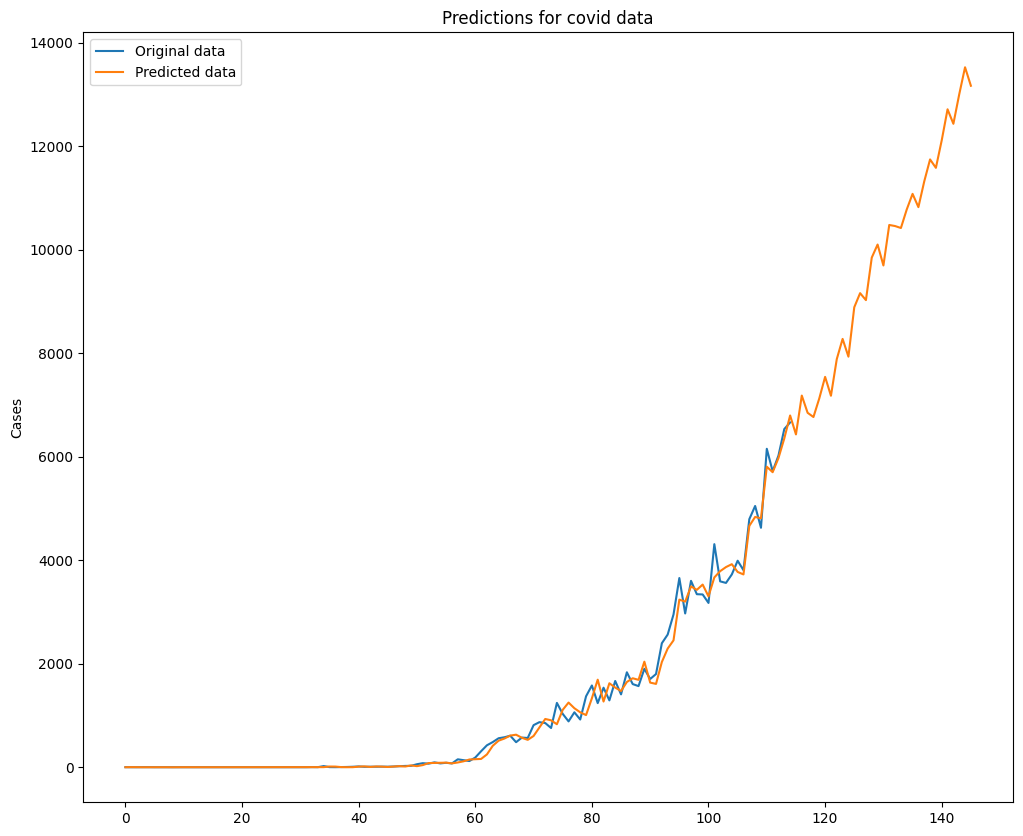

In [83]:
arima = ARIMA(cases,order=(13,2,14))
predict_arima = arima.fit().predict(end=len(cases)+30) #predicting the data. End len of cases here means predicting till 115 cases, +30 means predicting above that values
plt.figure(figsize=(12,10))
plt.plot(cases,label='Original data')
plt.plot(predict_arima,label='Predicted data')
plt.ylabel('Cases')
plt.title('Predictions for covid data')
plt.legend()

# MJD data

P-value of the data 0.8050302703804764
p_value after first order differencing  2.1521216478590396e-11
Therefore the series is now stationary with d=1


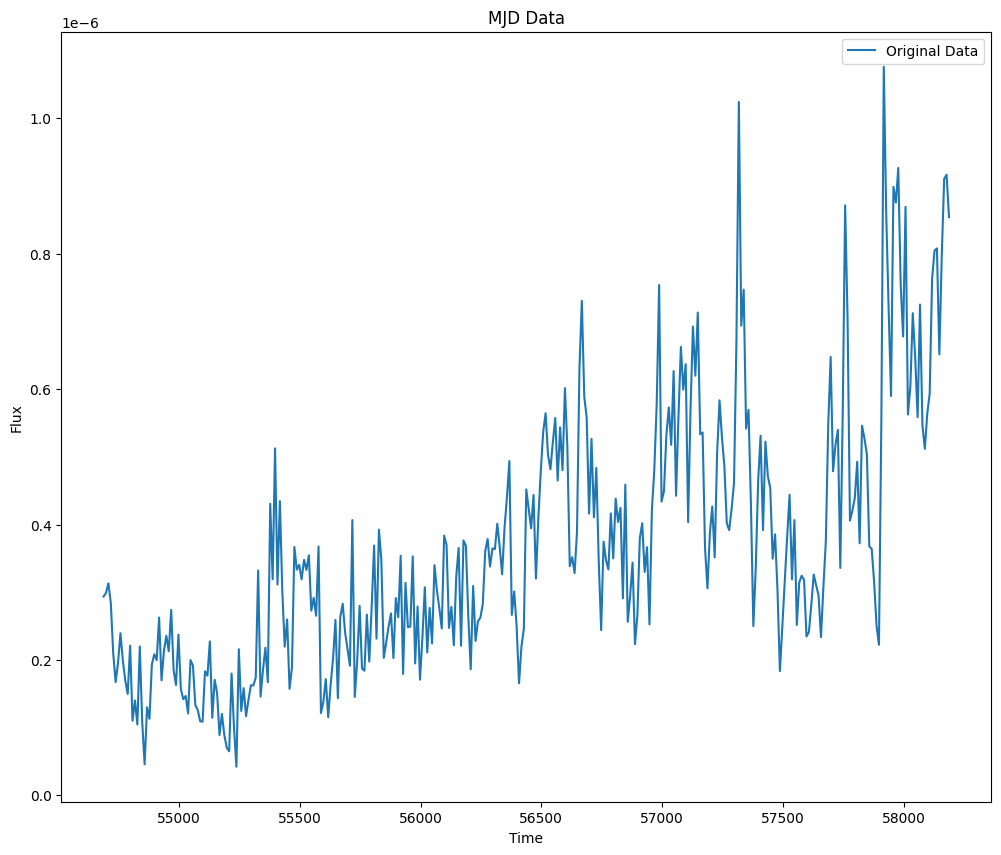

In [84]:
# MJD flux
df_mjd = pd.read_csv('mjd_flux.csv')
time = (df_mjd['MJD'])
flux = (df_mjd['FLUX'])
plt.figure(figsize=(12,10))
plt.plot(time,flux,label='Original Data')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('MJD Data')
plt.legend()

#stationary tests and adfuller
adf = adfuller(flux)
print('P-value of the data',adf[1])
flux_1 = flux.diff().dropna()
adf1 = adfuller(flux_1)
print('p_value after first order differencing ',adf1[1])
print('Therefore the series is now stationary with d=1')





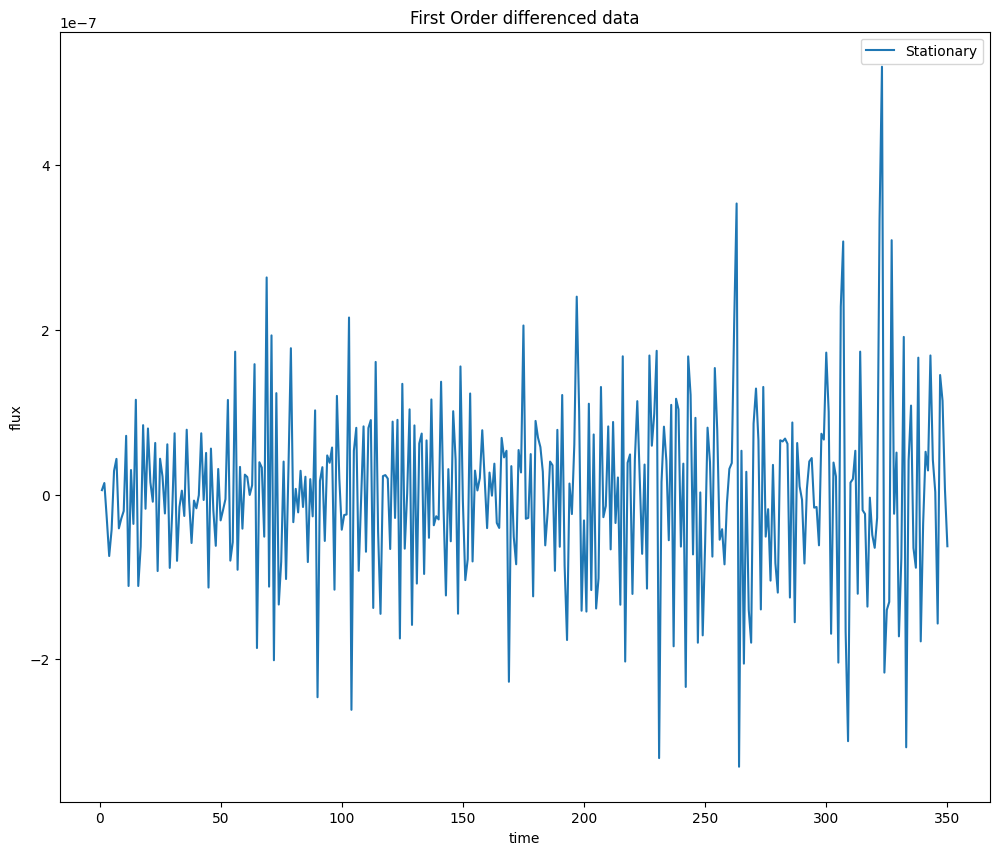

In [86]:
#stationary check
plt.figure(figsize=(12,10))
flux_1.plot(label='Stationary')
plt.xlabel('time')
plt.ylabel('flux')
plt.title('First Order differenced data')
plt.legend()

From the graph of pacf and acf the p and q values are 15,17


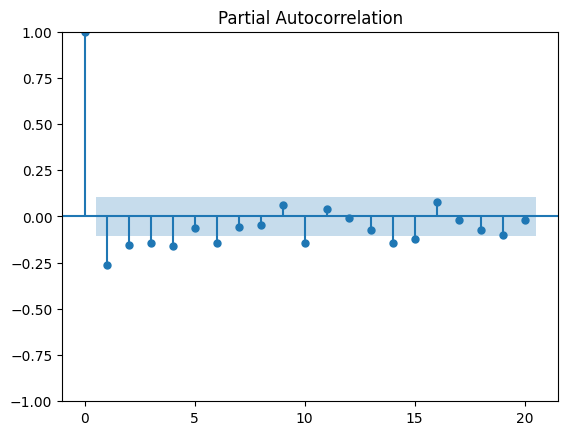

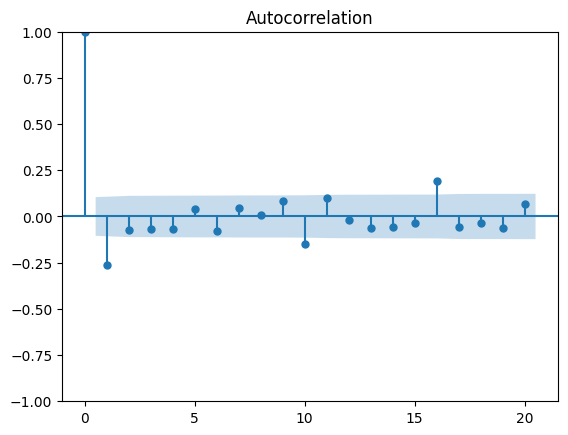

In [62]:
pacf = plot_pacf(flux_1,lags=20)
acf = plot_acf(flux_1,lags=20)
#we are taking the mod values of
print('From the graph of pacf and acf the p and q values are 15,17')

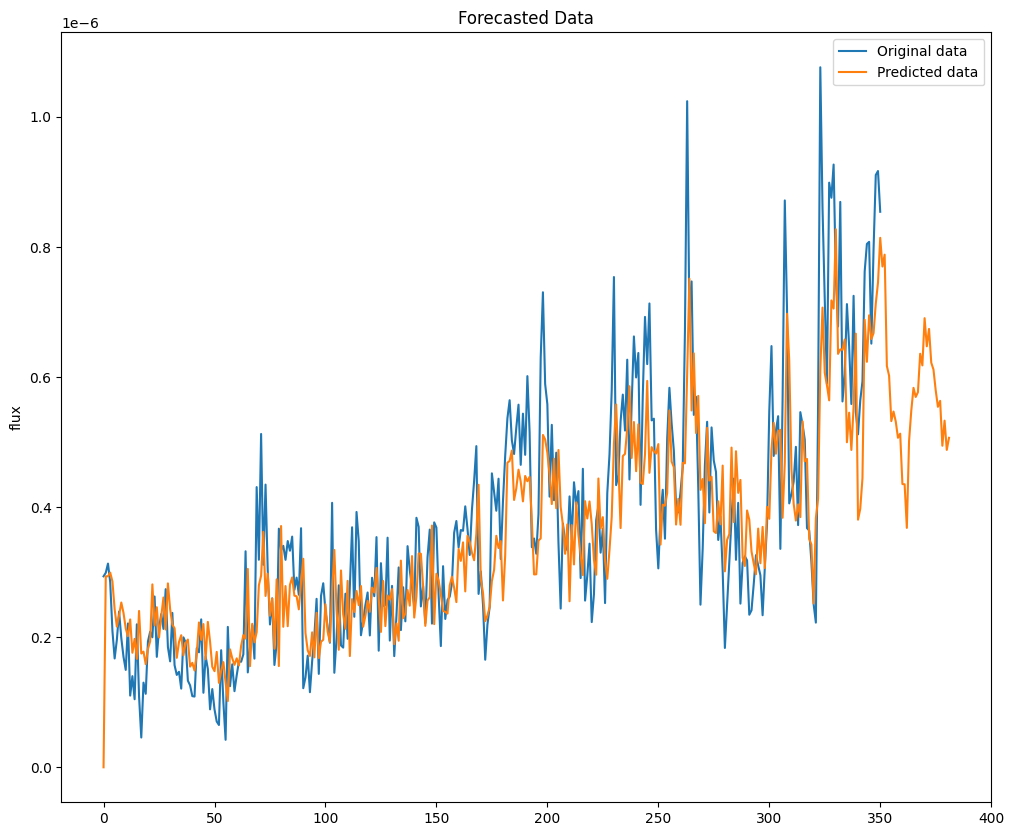

In [87]:
arima = ARIMA(flux,order=(15,1,17))
predict_arima = arima.fit().predict(end=len(flux)+30) #predicting the data. End len of cases here means predicting till 115 cases, +30 means predicting above that values
plt.figure(figsize=(12,10))
plt.plot(flux,label='Original data')
plt.plot(predict_arima,label='Predicted data')
plt.ylabel('flux')
plt.title('Forecasted Data')
plt.legend()

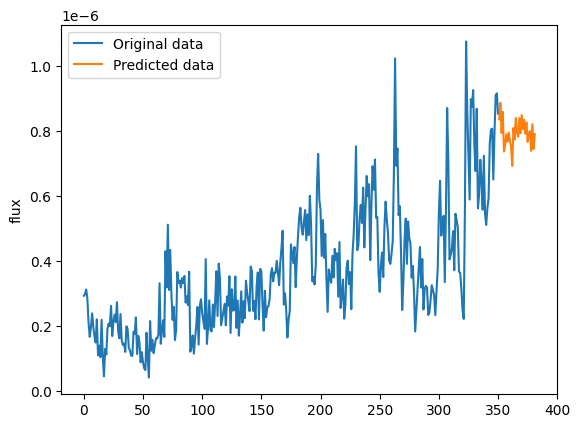

In [69]:
arima = ARIMA(flux,order=(15,1,16))
predict_arima = arima.fit().predict(start=len(flux),end=len(flux)+30) #predicting the data. End len of cases here means predicting till 115 cases, +30 means predicting above that values
plt.plot(flux,label='Original data')
plt.plot(predict_arima,label='Predicted data')
plt.ylabel('flux')
plt.legend()

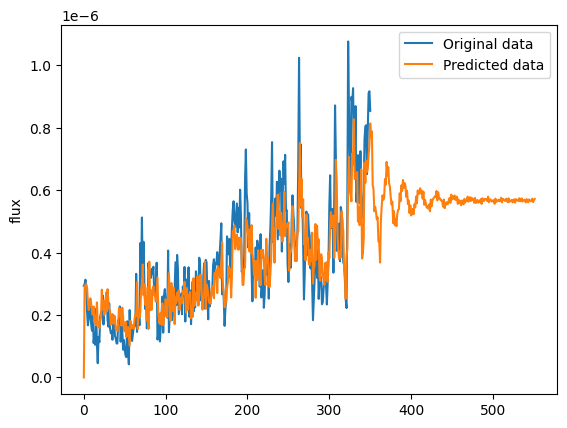

In [72]:
arima = ARIMA(flux,order=(15,1,17))
predict_arima = arima.fit().predict(end=len(flux)+200) #predicting the data. End len of cases here means predicting till 115 cases, +30 means predicting above that values
plt.plot(flux,label='Original data')
plt.plot(predict_arima,label='Predicted data')
plt.ylabel('flux')
plt.legend()

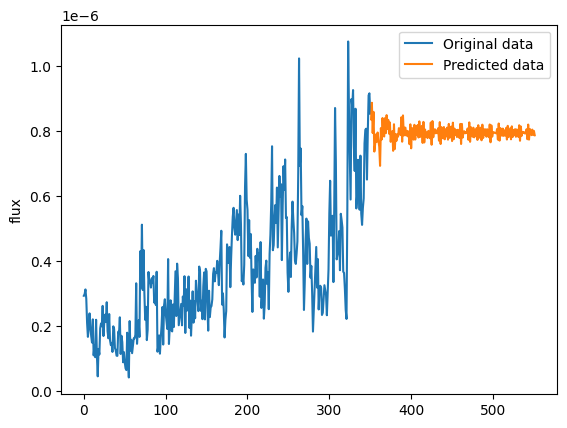

In [73]:
arima = ARIMA(flux,order=(15,1,16))
predict_arima = arima.fit().predict(start=len(flux),end=len(flux)+200) #predicting the data. End len of cases here means predicting till 115 cases, +30 means predicting above that values
plt.plot(flux,label='Original data')
plt.plot(predict_arima,label='Predicted data')
plt.ylabel('flux')
plt.legend()